In [1]:
# Import the pandas library for data and analysis manipulation.
# Assign pandas library to a shorter alias 'pd'.

import pandas as pd

In [2]:
# Define an empty dictionary named 'dtype_dict'
# This dictionary will map certain data attributes to their respective data types.

dtype_dict = {
    "vcf_filter": str, # Data in "vcf_filter" column should be treated as type 'string' (text).
    "vcf_mutect": float, # Data in "vcf_count_mutect" should be treated as floating-point numbers.
    "cosmic_haem": str,  # Data in "cosmic_haem" column should be treated as type 'string' (text).
    "vcf_pindel": float, # Data in "vcf_count_pindel" should be treated as floating-point numbers.
    "vaf": float, # Data in "vaf" should be treated as floating-point numbers.
    "depth": float, # Data in "depth" should be treated as floating-point numbers.
    "gnomAD_AF": float, # Data in "gnomad_AF" should be treated as floating-point numbers. 
    "genes": str, # Data in "gene_name" column should be treated as type 'string' (text).
    "variants": str, # Data in "variant" column should be treated as type 'string' (text).
    "var_type": str, # Data in "var_type" column should be treated as type 'string' (text).
    "virtual_panel": str, # Data in "virtual_panel" column should be treated as type 'string' (text).
}

In [7]:
# Load a CSV file into a pandas DataFrame.
# Specify additional parameters and store the resulting DataFrame in the variable 'data'.

# 'read_csv' function loads the file 'mock_filtration_dataset.csv'.
data = pd.read_csv(r'C:\Users\PC\Desktop\NGS-Mock-Variant-Analysis\4.data\mock_filtration_dataset.csv', 
                   # This disables low memory mode and allows pandas to read the entire file into memory, even if it's large.
                   low_memory=False,  
                   # 'dtype_dict' specifies the data types for specific columns in the CSV file.
                   dtype=dtype_dict) 

In [ ]:
# Clean the DataFrame by removing empty rows and columns.
# Use 'dropna' function to remove rows and columns with missing values.
# 'how = 'all' specifies that only rows where all elements are NaN should be remove.
# 'inplace=True' modifies the DataFrame 'data' directly, returning a new DataFrame without altering the original.

data.dropna(how='all', inplace=True)

In [25]:
# Process to select highest number from cosmic haem column.

def process_cosmic_haem(number):
    # Check if the value is not missing (NaN).
    if pd.notna(number):  
        # Check if the '|' delimiter is present in the number.
        if '|' in number:
            # Split the string by delimiter '|' and 'map' function convert each part to a floating number.
            parts = map(float, number.split('|'))
            # Return the maximum number from the list of floats using 'max()'.
            return max(parts)
        else:
            # If no delimiter is present, Convert the `number` directly to a floating-point value using `float(number)` and return the converted value.
            return float(number)
    # If the value is NaN, return the original value (`number`) unchanged.
    return number

In [27]:
# Check the data type of the values in the 'cosmic_haem' column of the DataFrame.

print(data['cosmic_haem'].dtypes)

object


In [29]:
# Apply the function to the 'cosmic_haem' column of the DataFrame 'data'
# The `.apply()` method processes each element in the column individually and updating each column with the new transformed number.

data['cosmic_haem'] = data['cosmic_haem'].apply(process_cosmic_haem)

In [31]:
# Display the first few rows of the DataFrame using the 'head()' method without argument to show first 5 rows by default.
# This is neccessary to quickly check if the data was loaded correctly.

data.head()

,sample_id,variants,genes,cNomen,pNomen,run,vaf,depth,vcf_mutect,vcf_pindel,...,virtual_panel,gnomAD_AF,gnomAD_AF_Pct,cosmic_id,cosmic_haem,run_freq,total_freq,length,var_type,technical_status
0,Mock001,KRAS_2_160883814_A/G,KRAS,c.1077A>G,p.Ala1367Val,Run1,0.377,354.0,22.0,26.0,...,panhaem_myeloid,0.019014,1.9014,COSM444461,0.0,2,86,15,deletion,Discard
1,Mock002,KRAS_20_183670202_A/G,KRAS,c.2772A>G,p.Ala228Val,Run1,0.727,254.0,29.0,27.0,...,panhaem_myeloid,0.011973,1.1973,COSM989868,6.0,3,84,45,indel,Valid
2,Mock003,KRAS_22_5738866_A/G,KRAS,c.2073A>G,p.Ala218Val,Run3,0.163,291.0,41.0,35.0,...,panhaem_myeloid,0.003120,0.3120,COSM924050,2.0,0,80,37,deletion,Discard
3,Mock004,BRCA2_18_377694477_A/G,BRCA2,c.2030A>G,p.Ala947Val,Run3,0.067,619.0,39.0,50.0,...,panhaem_myeloid,0.017324,1.7324,COSM606687,2.0,3,68,14,substitution,Valid
4,Mock005,ARID1A_15_547373809_A/G,ARID1A,c.382A>G,p.Ala782Val,Run2,0.599,718.0,33.0,14.0,...,panhaem_myeloid,0.014161,1.4161,COSM938076,9.0,0,11,31,indel,Discard


In [33]:
# Convert necessary columns to numeric data format using the 'pd.to_numeric()' function.

# Define a list of columns that need to be converted to numeric types.
numeric_columns = ['vcf_mutect', 'vcf_pindel', 'cosmic_haem', 'gnomAD_AF', 'vaf', 'depth']
# Iterate over each column name in `numeric_columns` using a for-loop:
for col in numeric_columns: 
    # `pd.to_numeric()` function convert strings or other types in the column to integers or floats.
    data[col] = pd.to_numeric(data[col]) 

In [35]:
# Define the lenght and calculate the difference between REF and ALT lengths.

def calculate_variant_length(variant):
    # Extract the REF and ALT.
    # Split into REF and ALT parts based on '/'.
    ref_alt = variant.split('/')  
    # Get the REF from the part after the last '_'.
    ref = ref_alt[0].split('_')[-1]  
    # ALT is directly after the '/'.
    alt = ref_alt[1]  
    
    # use `len()` function to get the lengths of both strings and subtract the `ref` from the `alt` lengths. 
    # the `abs()` function to ensure the result is always positive, regardless whether the ALT is longer or shorter or vice versa.
    return abs(len(alt) - len(ref))

In [37]:
# Create a new 'length' column by applying the calculate_length function.
# Use `.apply()` method to apply the `calculate_variant_length` function to each value in the "variant" column.
# Assign the outcome of length different into a new column named "length" in the DataFrame.

data['length'] = data['variants'].apply(calculate_variant_length)

In [39]:
# Display the first few rows of the DataFrame using the 'head()' method without an argument to show the first 5 rows by default.
# This is necessary to quickly check if the data was loaded correctly.

data.head()

,sample_id,variants,genes,cNomen,pNomen,run,vaf,depth,vcf_mutect,vcf_pindel,...,virtual_panel,gnomAD_AF,gnomAD_AF_Pct,cosmic_id,cosmic_haem,run_freq,total_freq,length,var_type,technical_status
0,Mock001,KRAS_2_160883814_A/G,KRAS,c.1077A>G,p.Ala1367Val,Run1,0.377,354.0,22.0,26.0,...,panhaem_myeloid,0.019014,1.9014,COSM444461,0.0,2,86,0,deletion,Discard
1,Mock002,KRAS_20_183670202_A/G,KRAS,c.2772A>G,p.Ala228Val,Run1,0.727,254.0,29.0,27.0,...,panhaem_myeloid,0.011973,1.1973,COSM989868,6.0,3,84,0,indel,Valid
2,Mock003,KRAS_22_5738866_A/G,KRAS,c.2073A>G,p.Ala218Val,Run3,0.163,291.0,41.0,35.0,...,panhaem_myeloid,0.003120,0.3120,COSM924050,2.0,0,80,0,deletion,Discard
3,Mock004,BRCA2_18_377694477_A/G,BRCA2,c.2030A>G,p.Ala947Val,Run3,0.067,619.0,39.0,50.0,...,panhaem_myeloid,0.017324,1.7324,COSM606687,2.0,3,68,0,substitution,Valid
4,Mock005,ARID1A_15_547373809_A/G,ARID1A,c.382A>G,p.Ala782Val,Run2,0.599,718.0,33.0,14.0,...,panhaem_myeloid,0.014161,1.4161,COSM938076,9.0,0,11,0,indel,Discard


In [41]:
def apply_combine_filtration_rules(row):
    # Initialise the status variable
    status = "Unknown"

    # 1. Apply the rule for the CHEK2 gene.
    # Check if the gene_name is 'CHEK2' and if the term 'panhaem_myeloid' is present in the virtual_panel column.
    if row['genes'] == 'CHEK2' and 'panhaem_myeloid' in row['virtual_panel']:
        status = "Discard"

    # 2. Apply the rule based on the variant caller.
    # Check if "variant_caller" does not equal "both".
    elif row['variant_caller'] != 'both':
        if row['vcf_mutect'] > 10 or row['vcf_pindel'] > 10:
            if row['genes'] == 'ASXL1' and row ["variants"] == 'ASXL1_20_31022441_A/AG':
                status = "Retain"
            elif pd.notna(row['cosmic_haem']) and row['cosmic_haem'] >= 5:
                status = "Retain"
            else:
                status = "Discard"
        else:
            status = "Retain"

    # Check if "variant_caller" is equal to "both".
    elif row['variant_caller'] == 'both':
        # Check if either 'mutect_vcf_count' and 'pindel_vcf_count' greater than 10.
        if row['vcf_mutect'] > 10 and row['vcf_pindel'] > 10:
            if row['genes'] == 'ASXL1' and row ["variants"] == 'ASXL1_20_31022441_A/AG':
                status = "Retain"
            elif pd.notna(row['cosmic_haem']) and row['cosmic_haem'] >= 5:
                status = "Retain"
            else:
                status = "Discard"
        else:
            status = "Retain"
                
    # 3. Apply the rule for KMT2C and ARID1A genes.
    # Check if the gene_name is in ['KMT2C', 'ARID1A']:
    elif row['genes'] in ['KMT2C', 'ARID1A']:
        # If the vaf (Variant Allele Frequency) is less than 20% (0.20).
        if row['vaf'] < 0.20:
            status = "Discard"
        else:
            status = "Retain"

    
    # 4. Apply the rule based on gnomAD AF.
    # Check if gnomad_AF is greater than or equal to 1% (0.01) and the comic_haem column is less than 5.
    elif row['gnomAD_AF'] >= 0.01 and row['cosmic_haem'] < 5:
        status = "Discard"

    

    # 5. Apply rule based on Larger variants where (VAF < 5%).
    # If the first condition is met, check if the vaf is less than 5% (0.05) and depth is greater than or equal to 100.
    elif row['vaf'] < 0.05 and row['depth'] >= 100:
        # Apply special rule for FLT3 by checking if the gene name is 'FLT3' and the length is divisible by 3.
        if row['genes'] == 'FLT3' and row['length'] % 3 == 0:
            status = "awaiting fragment analysis"
        else:
            status = "Discard"

    
    # 6. Apply the filtration rule for substitution variant.
    # Check if the 'var_type' of the variant is 'substitution'.
    elif row['var_type'] == 'substitution':
        # If the variant is a substitution, check if the 'vcf_filter' is 'PASS'.
        if row['vcf_filter'] == 'PASS' and (
            # The 'cosmic_haem' is not missing (not NaN) and is less than or equal to 5.
            (pd.notna(row['vcf_mutect']) and row['vcf_mutect'] < 5) or
            # The 'cosmic_haem' is not missing (not NaN) and greater than or equal to 5
            (pd.notna(row['cosmic_haem']) and row['cosmic_haem'] >= 5)
        ):
            status = "Retain"
        else:
            status = "Discard"

    
    # 7. Apply filtration rule for small 'insertion', 'deletion', 'indel' variants (<20bp).
    # Check if the length of the variant is less than 20 and the var_type is one of 'insertion', 'deletion' or 'indel'.)
    elif row['length'] < 20 and row['var_type'] in ['insertion', 'deletion', 'indel']:
        # If the variant type is one of the specified types, check if the vcf_filter is 'PASS' or missing (NaN).
        if (row['vcf_filter'] == 'PASS' or pd.isna(row['vcf_filter'])) and (
            # The vcf_count_mutect is not missing and less than 5.
            pd.notna(row['vcf_mutect']) and row['vcf_mutect'] < 5 and
            # The vcf_count_pindel is not missing and less than 5.
            pd.notna(row['vcf_pindel']) and row['vcf_pindel'] < 5
        ):
            status = "Retain"
        else:
            status = "Discard"



    # Return the final status after all rules are evaluated
    return status

In [43]:
# Create a new column 'retain_discard' in the DataFrame.
# Use the 'apply' method to apply the filtering rule function 'apply_combine_validation_rules' to each row.
# The 'axis=1' argument specifies that the function should be applied row-wise, as (axis=0 would apply it to columns).

data['retain_discard'] = data.apply(apply_combine_validation_rules, axis=1)

In [33]:
# Write the DataFrame to a CSV file named 'mock_validation_rules.csv'.
# Use the 'to_csv()' method on the DataFrame 'data' to save it to a CSV file.
# Set the 'index' parameter to False to prevent writing row indices to the CSV file.

data.to_csv('mock_validation_rules.csv', index=False)

In [45]:
# Display the first few rows of the DataFrame using the 'head()' method without argument to show first 5 rows by default.
# This is neccessary to quickly check if the data was loaded correctly.

data.head()

,sample_id,variants,genes,cNomen,pNomen,run,vaf,depth,vcf_mutect,vcf_pindel,...,gnomAD_AF,gnomAD_AF_Pct,cosmic_id,cosmic_haem,run_freq,total_freq,length,var_type,technical_status,retain_discard
0,Mock001,KRAS_2_160883814_A/G,KRAS,c.1077A>G,p.Ala1367Val,Run1,0.377,354.0,22.0,26.0,...,0.019014,1.9014,COSM444461,0.0,2,86,0,deletion,Discard,Discard
1,Mock002,KRAS_20_183670202_A/G,KRAS,c.2772A>G,p.Ala228Val,Run1,0.727,254.0,29.0,27.0,...,0.011973,1.1973,COSM989868,6.0,3,84,0,indel,Valid,Retain
2,Mock003,KRAS_22_5738866_A/G,KRAS,c.2073A>G,p.Ala218Val,Run3,0.163,291.0,41.0,35.0,...,0.003120,0.3120,COSM924050,2.0,0,80,0,deletion,Discard,Discard
3,Mock004,BRCA2_18_377694477_A/G,BRCA2,c.2030A>G,p.Ala947Val,Run3,0.067,619.0,39.0,50.0,...,0.017324,1.7324,COSM606687,2.0,3,68,0,substitution,Valid,Discard
4,Mock005,ARID1A_15_547373809_A/G,ARID1A,c.382A>G,p.Ala782Val,Run2,0.599,718.0,33.0,14.0,...,0.014161,1.4161,COSM938076,9.0,0,11,0,indel,Discard,Retain


In [37]:
# Print the new modified data to the console using the 'print()' function.
# Call the 'print()' function with the message: "validation data saved to 'mock_filtration_rules.csv'.

print("validation data saved to 'mock_validation_rules.csv'")

filteration data saved to 'mock_filtration_rules.csv'


In [47]:
# Filter rows where the gene_name is 'CHEK2'
chek2_data = data[data['genes'] == 'CHEK2']

# Select only the relevant columns
chek2_columns = chek2_data[['genes', 'panel', 'virtual_panel', 'retain_discard']]

# Print the filtered data
print(chek2_columns)

    genes    panel    virtual_panel retain_discard
6   CHEK2  PanHaem  panhaem_myeloid        Discard
7   CHEK2  PanHaem  panhaem_myeloid        Discard
46  CHEK2  PanHaem  panhaem_myeloid        Discard
49  CHEK2  PanHaem  panhaem_myeloid        Discard
53  CHEK2  PanHaem  panhaem_myeloid        Discard
57  CHEK2  PanHaem  panhaem_myeloid        Discard
59  CHEK2  PanHaem  panhaem_myeloid        Discard
85  CHEK2  PanHaem  panhaem_myeloid        Discard
86  CHEK2  PanHaem  panhaem_myeloid        Discard


In [369]:
chek2_columns.to_csv('chek2_columns.csv', index=False)

In [49]:
# Filter rows where vcf_count_pindel or vcf_count_mutect > 10
filtered_variants = data[(data['vcf_pindel'] > 10) | (data['vcf_mutect'] > 10)]

# Select the desired columns
variant_call = filtered_variants[['genes', 'vaf', 'vcf_pindel', 'vcf_mutect', 'retain_discard']]

# Print the result
print(variant_call)

     genes    vaf  vcf_pindel  vcf_mutect retain_discard
0     KRAS  0.377        26.0        22.0        Discard
1     KRAS  0.727        27.0        29.0         Retain
2     KRAS  0.163        35.0        41.0        Discard
3    BRCA2  0.067        50.0        39.0        Discard
4   ARID1A  0.599        14.0        33.0         Retain
..     ...    ...         ...         ...            ...
95  ARID1A  0.101         1.0        19.0         Retain
96   KMT2C  0.892        36.0        21.0         Retain
97  DNMT3A  0.342         1.0        34.0        Discard
98   ANA10  0.721        37.0         1.0         Retain
99  DNMT3A  0.879         4.0        33.0         Retain

[96 rows x 5 columns]


In [373]:
variant_call.to_csv('variant_call.csv', index=False)

In [51]:
# Filter rows where gene_name is either KMT2C or ARID1A
kmt_aridia_genes = data[data['genes'].isin(['KMT2C', 'ARID1A'])]

# Select the columns gene_name, vaf, and retain_discard (or status)
kmt_aridia_columns = kmt_aridia_genes[['genes', 'vaf', 'retain_discard']]

# Print the result
print(kmt_aridia_columns)

     genes    vaf retain_discard
4   ARID1A  0.599         Retain
5    KMT2C  0.030         Retain
11   KMT2C  0.296        Discard
21   KMT2C  0.044         Retain
23   KMT2C  0.315         Retain
40   KMT2C  0.856         Retain
44   KMT2C  0.879         Retain
50  ARID1A  0.041        Discard
54  ARID1A  0.234         Retain
55  ARID1A  0.294         Retain
60   KMT2C  0.801        Discard
62   KMT2C  0.233        Discard
81  ARID1A  0.631         Retain
93  ARID1A  0.811         Retain
95  ARID1A  0.101         Retain
96   KMT2C  0.892         Retain


In [377]:
kmt_aridia_columns.to_csv('kmt_aridia_columns.csv', index=False)

In [53]:
# Filter rows where gnomad_AF >= 0.01 and cosmic_haem < 5
AF_cosmic_variants = data[(data['gnomAD_AF'] >= 0.01) & (data['cosmic_haem'] < 5)]

# Select the columns gnomad_AF, cosmic_haem, and retain_discard
AF_cosmic_columns = AF_cosmic_variants[['gnomAD_AF', 'cosmic_haem', 'retain_discard']]

# Print the result
print(AF_cosmic_columns)

    gnomAD_AF  cosmic_haem retain_discard
0    0.019014          0.0        Discard
3    0.017324          2.0        Discard
8    0.010495          1.0        Discard
12   0.015704          3.0        Discard
13   0.010285          0.0        Discard
16   0.018978          1.0        Discard
43   0.012751          3.0         Retain
50   0.012728          3.0        Discard
53   0.015111          0.0        Discard
59   0.010787          4.0        Discard
60   0.017922          4.0        Discard
63   0.017215          3.0        Discard
64   0.010215          0.0        Discard
69   0.019436          4.0        Discard
73   0.010054          3.0        Discard
78   0.015232          0.0        Discard
95   0.017944          0.0         Retain


In [381]:
# Check rows where gnomad_AF >= 0.01
print(data[data['gnomAD_AF'] >= 0.01])

   sample_id                 variants   genes     cNomen        pNomen   run  \
0    Mock001     KRAS_2_160883814_A/G    KRAS  c.1077A>G  p.Ala1367Val  Run1   
1    Mock002    KRAS_20_183670202_A/G    KRAS  c.2772A>G   p.Ala228Val  Run1   
3    Mock004   BRCA2_18_377694477_A/G   BRCA2  c.2030A>G   p.Ala947Val  Run3   
4    Mock005  ARID1A_15_547373809_A/G  ARID1A   c.382A>G   p.Ala782Val  Run2   
5    Mock006    KMT2C_21_18190061_A/G   KMT2C  c.1196A>G   p.Ala292Val  Run2   
8    Mock009    TP53_21_800991559_A/G    TP53  c.2555A>G  p.Ala1132Val  Run1   
12   Mock013   ANA10_12_787666185_A/G   ANA10   c.667A>G  p.Ala1044Val  Run1   
13   Mock014    TP53_17_551187505_A/G    TP53   c.354A>G   p.Ala658Val  Run1   
16   Mock017   ANA10_17_205498087_A/G   ANA10  c.2916A>G  p.Ala1175Val  Run1   
17   Mock018   ANA10_17_928189901_A/G   ANA10   c.613A>G   p.Ala220Val  Run3   
21   Mock022    KMT2C_19_91897700_A/G   KMT2C  c.1241A>G  p.Ala1462Val  Run3   
22   Mock023     KRAS_9_509711015_A/G   

In [55]:
# Filter rows where vaf < 5% and read depth greater than 100.
vaf_depth_variants = data[(data['vaf'] < 0.05) & (data['depth'] > 100)]

# Select the columns 'gene_name', 'vaf', 'depth', 'retain_discard'.
vaf_depth_columns = vaf_depth_variants[['genes', 'vaf', 'depth', 'length', 'retain_discard']]

# Print the result
print(vaf_depth_columns)

     genes    vaf  depth  length retain_discard
5    KMT2C  0.030  279.0       0         Retain
21   KMT2C  0.044  132.0       0         Retain
36   ASXL1  0.015  485.0       0         Retain
49   CHEK2  0.035  204.0       0        Discard
50  ARID1A  0.041  476.0       0        Discard
64   BRCA2  0.017  291.0       0        Discard


In [385]:
vaf_depth_columns.to_csv('vaf_depth_columns.csv', index=False)

In [57]:
# Filter rows where vaf < 5% and read depth greater than 100.
sub_variants = data[(data['var_type'] == 'substitution') & (data['vcf_filter'] == 'PASS') & (data['vcf_mutect'] < 5) & (data['cosmic_haem'] >= 5)]

# Select the columns 'gene_name', 'vaf', 'depth', 'retain_discard'.
sub_columns = sub_variants[['genes', 'var_type', 'vcf_filter', 'vcf_mutect', 'cosmic_haem', 'retain_discard']]

# Print the result
print(sub_columns)

   genes      var_type vcf_filter  vcf_mutect  cosmic_haem retain_discard
22  KRAS  substitution       PASS         1.0         10.0         Retain
32  KRAS  substitution       PASS         3.0          5.0         Retain


In [389]:
sub_columns.to_csv('sub_columns.csv', index=False)

In [59]:
# Filter rows where vaf < 5% and read depth greater than 100.
small_variants = data[(data['length'] < 20) & (data['var_type'].isin(['insertion', 'deletion', 'indel'])) & (data['vcf_filter'] == 'PASS') & (data['vcf_mutect'] < 5) & (data['vcf_pindel'] < 5)]

# Select the columns 'gene_name', 'vaf', 'depth', 'retain_discard'.
small_columns = small_variants[['genes', 'var_type', 'vcf_filter', 'vcf_mutect', 'cosmic_haem', 'length', 'retain_discard']]

# Print the result
print(small_columns)

     genes var_type vcf_filter  vcf_mutect  cosmic_haem  length retain_discard
42  DNMT3A    indel       PASS         4.0          3.0       0         Retain


In [55]:
small_columns.to_csv('small_columns.csv', index=False)

In [61]:
# Function to calculate absolute difference between REF and ALT lengths
def calculate_variant_length(variant):
    ref_alt = variant.split('/')
    ref = ref_alt[0].split('_')[-1]
    alt = ref_alt[1]
    return abs(len(alt) - len(ref))

# Apply length calculation
data['length'] = data['variants'].apply(calculate_variant_length)

# Display updated data
print(data.head())

# Function to apply filtering logic
def apply_combine_filtration_rules(row):
    status = "Unknown"
    
    if row['genes'] == 'CHEK2' and 'panhaem_myeloid' in row['virtual_panel']:
        status = "Discard"
    
    elif row['variant_caller'] != 'both':
        if row['vcf_mutect'] > 10 or row['vcf_pindel'] > 10:
            if row['genes'] == 'ASXL1' and row["variants"] == 'ASXL1_20_31022441_A/AG':
                status = "Retain"
            elif pd.notna(row['cosmic_haem']) and row['cosmic_haem'] >= 5:
                status = "Retain"
            else:
                status = "Discard"
        else:
            status = "Retain"
    
    elif row['variant_caller'] == 'both':
        if row['vcf_mutect'] > 10 and row['vcf_pindel'] > 10:
            if row['genes'] == 'ASXL1' and row["variants"] == 'ASXL1_20_31022441_A/AG':
                status = "Retain"
            elif pd.notna(row['cosmic_haem']) and row['cosmic_haem'] >= 5:
                status = "Retain"
            else:
                status = "Discard"
        else:
            status = "Retain"
    
    elif row['genes'] in ['KMT2C', 'ARID1A']:
        if row['vaf'] < 0.20:
            status = "Discard"
        else:
            status = "Retain"
    
    elif row['gnomAD_AF'] >= 0.01 and row['cosmic_haem'] < 5:
        status = "Discard"
    
    elif row['vaf'] < 0.05 and row['depth'] >= 100:
        if row['genes'] == 'FLT3' and row['length'] % 3 == 0:
            status = "Retain"
        else:
            status = "Discard"
    
    else:
        status = "Retain"
    
    return status

  sample_id                 variants   genes     cNomen        pNomen   run  \
0   Mock001     KRAS_2_160883814_A/G    KRAS  c.1077A>G  p.Ala1367Val  Run1   
1   Mock002    KRAS_20_183670202_A/G    KRAS  c.2772A>G   p.Ala228Val  Run1   
2   Mock003      KRAS_22_5738866_A/G    KRAS  c.2073A>G   p.Ala218Val  Run3   
3   Mock004   BRCA2_18_377694477_A/G   BRCA2  c.2030A>G   p.Ala947Val  Run3   
4   Mock005  ARID1A_15_547373809_A/G  ARID1A   c.382A>G   p.Ala782Val  Run2   

     vaf  depth  vcf_mutect  vcf_pindel  ... gnomAD_AF gnomAD_AF_Pct  \
0  0.377  354.0        22.0        26.0  ...  0.019014        1.9014   
1  0.727  254.0        29.0        27.0  ...  0.011973        1.1973   
2  0.163  291.0        41.0        35.0  ...  0.003120        0.3120   
3  0.067  619.0        39.0        50.0  ...  0.017324        1.7324   
4  0.599  718.0        33.0        14.0  ...  0.014161        1.4161   

    cosmic_id cosmic_haem  run_freq  total_freq length      var_type  \
0  COSM444461       

In [63]:
# Apply the filtration rules

data['filter_status'] = data.apply(apply_combine_filtration_rules, axis=1)

In [65]:
# Show filtered dataset

print(data[['genes', 'variants', 'filter_status']].head())

    genes                 variants filter_status
0    KRAS     KRAS_2_160883814_A/G       Discard
1    KRAS    KRAS_20_183670202_A/G        Retain
2    KRAS      KRAS_22_5738866_A/G       Discard
3   BRCA2   BRCA2_18_377694477_A/G       Discard
4  ARID1A  ARID1A_15_547373809_A/G        Retain


In [67]:
# Save the filtered dataset to a new CSV file

data.to_csv('filtered_variant_dataset.csv', index=False)
print("Filtered data saved to 'filtered_variant_dataset.csv'")

Filtered data saved to 'filtered_variant_dataset.csv'


In [67]:
# Summary of filter status counts
summary = data['filter_status'].value_counts()
print("\nSummary of filter results:")
print(summary)

# Save summary to a text file
with open("variant_filter_summary.txt", "w") as file:
    file.write("Filter Status Summary:\n")
    file.write(summary.to_string())


Summary of filter results:
filter_status
Retain     60
Discard    40
Name: count, dtype: int64


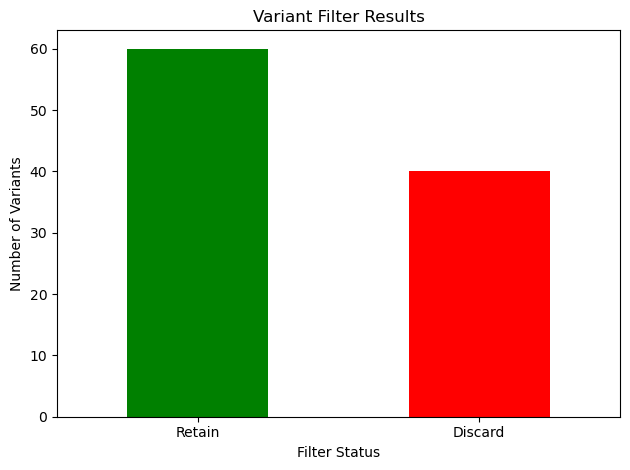

In [69]:
import matplotlib.pyplot as plt

# Plotting the filter result
summary.plot(kind='bar', color=['green', 'red'])
plt.title('Variant Filter Results')
plt.xlabel('Filter Status')
plt.ylabel('Number of Variants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('variant_filter_plot.png')


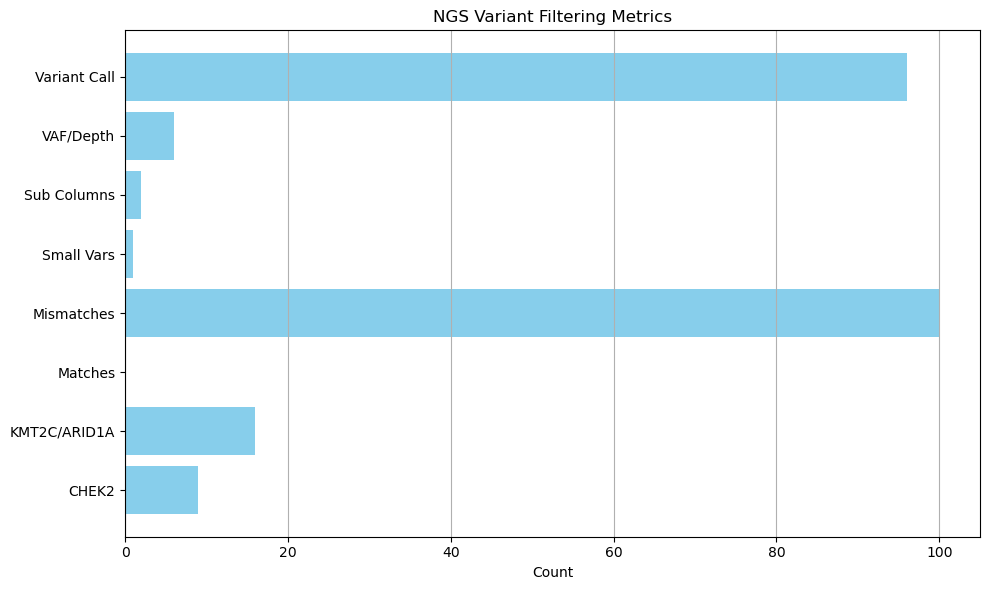

In [71]:
import matplotlib.pyplot as plt

labels = ['CHEK2', 'KMT2C/ARID1A', 'Matches', 'Mismatches', 'Small Vars', 'Sub Columns', 'VAF/Depth', 'Variant Call']
values = [9, 16, 0, 100, 1, 2, 6, 96]

plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Count")
plt.title("NGS Variant Filtering Metrics")
plt.grid(axis='x')
plt.tight_layout()


Text(0.5, 1.0, 'Match vs Mismatch Proportion')

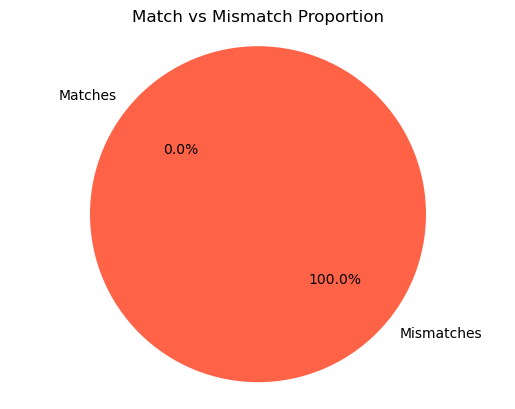

In [73]:
labels = ['Matches', 'Mismatches']
sizes = [0, 100]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'tomato'])
plt.axis('equal')
plt.title("Match vs Mismatch Proportion")
